In [1]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES']='1'

solver = "ECOS"
save_data = False

In [2]:
# from kelly_gambling import *
# dataset = "kelly"

# from cvar_stock_option import *
# dataset = "cvar"

# from exp_density_polynomial import *
# dataset = "exp"

from news_vendor import *
dataset = "vecnewsven"

device = cpu


In [3]:
from osmm import OSMM
import pickle
import datetime

In [4]:
max_num_rounds = 100

In [5]:
alg_props = {
    "r=20, M=20": [0, 20, 20],
}
    
num_algs = len(alg_props)

In [6]:
# Define structs:
objfs = np.zeros((num_algs, max_num_rounds))
objfs_validation = np.zeros((num_algs, max_num_rounds))
runtimes = np.zeros((num_algs, max_num_rounds))
iters_takens = np.zeros(num_algs)
damping_facs = np.ones((num_algs, max_num_rounds))
mus = np.ones((num_algs, max_num_rounds))
ts = np.ones((num_algs, max_num_rounds))
Xs = np.zeros((n, num_algs, max_num_rounds))
lower_bounds = np.ones((num_algs, max_num_rounds)) * (-np.inf)
best_xs = np.zeros((n, num_algs))
v_norms = np.zeros((num_algs, max_num_rounds))
num_f_evals = np.zeros((num_algs, max_num_rounds))
rms_residuals = np.zeros((num_algs, max_num_rounds))
q_norms = np.zeros((num_algs, max_num_rounds))
f_grad_norms = np.zeros((num_algs, max_num_rounds))
time_cost_details = np.zeros((5,num_algs, max_num_rounds))
baseline_opt_objf = []
baseline_time_cost = []

In [7]:
print("dataset = %s:" % (dataset))
W = generate_random_data()
if dataset == "kelly" or dataset == "exp":
    W_validation = None
else:
    W_validation = generate_random_data()
print("End generate data")

dataset = vecnewsven:
End generate data


In [8]:
osmm_prob = OSMM()
osmm_prob.f_torch.function = my_f_torch
osmm_prob.f_torch.W = W
osmm_prob.f_torch.W_validate = W_validation
osmm_prob.g_cvxpy.variable = g_var
osmm_prob.g_cvxpy.objective = g_obj
osmm_prob.g_cvxpy.constraints = g_constr

In [9]:
for alg_name in alg_props:
    print("    " + alg_name + ":")
    alg_idx = alg_props[alg_name][0]
    H_rank = alg_props[alg_name][1]
    M = alg_props[alg_name][2]
    
    osmm_prob.solve(init_val, max_iter=max_num_rounds, 
                    hessian_rank=H_rank, gradient_memory=M,
                    solver=solver, use_termination_criteria=False, verbose=True)

    Xs[:, alg_idx, :] = osmm_prob.method_results["var_iters"]
    objfs[alg_idx, :] = osmm_prob.method_results["objf_iters"]
    objfs_validation[alg_idx, :] = osmm_prob.method_results["objf_validate_iters"]
    lower_bounds[alg_idx, :] = osmm_prob.method_results["lower_bound_iters"]
    damping_facs[alg_idx, :] = osmm_prob.method_results["lam_iters"]
    mus[alg_idx, :] = osmm_prob.method_results["mu_iters"]
    ts[alg_idx, :] = osmm_prob.method_results["t_iters"]
    runtimes[alg_idx, :] = osmm_prob.method_results["time_iters"]
    best_xs[:, alg_idx] = osmm_prob.method_results["soln"]
    v_norms[alg_idx, :] = osmm_prob.method_results["v_norm_iters"]
    num_f_evals[alg_idx, :] = osmm_prob.method_results["num_f_evals_iters"]
    rms_residuals[alg_idx, :] = osmm_prob.method_results["rms_res_iters"]
    f_grad_norms[alg_idx, :] = osmm_prob.method_results["f_grad_norm_iters"]
    q_norms[alg_idx, :] = osmm_prob.method_results["q_norm_iters"]
    time_cost_details[:, alg_idx, :] = osmm_prob.method_results["time_detail_iters"]
    iters_takens[alg_idx] = osmm_prob.method_results["total_iters"]
    print("")

    r=20, M=20:
iter = 10, objf = -2.284e+00, lower bound = -2.319e+00, RMS residual = 3.609e-02, sampling acc = 1.274e-03, ||G||_F = 1.984e+01
iter = 20, objf = -2.292e+00, lower bound = -2.296e+00, RMS residual = 1.284e-02, sampling acc = 4.568e-03, ||G||_F = 7.611e+02
iter = 30, objf = -2.293e+00, lower bound = -2.294e+00, RMS residual = 1.424e-02, sampling acc = 4.906e-03, ||G||_F = 7.887e+02
iter = 40, objf = -2.293e+00, lower bound = -2.293e+00, RMS residual = 1.602e-02, sampling acc = 5.199e-03, ||G||_F = 8.915e+02
iter = 50, objf = -2.293e+00, lower bound = -2.293e+00, RMS residual = 7.025e-03, sampling acc = 5.148e-03, ||G||_F = 8.720e+03
iter = 60, objf = -2.293e+00, lower bound = -2.293e+00, RMS residual = 9.484e-03, sampling acc = 5.146e-03, ||G||_F = 1.327e+04
iter = 70, objf = -2.293e+00, lower bound = -2.293e+00, RMS residual = 2.233e-02, sampling acc = 5.150e-03, ||G||_F = 1.327e+04
iter = 80, objf = -2.293e+00, lower bound = -2.293e+00, RMS residual = 1.266e-02, sampli

In [10]:
_, N = W.shape
print("log10 N =", np.log10(N), ", n =", n)

log10 N = 3.0 , n = 501


In [11]:
stuff = {}
stuff["objfs"] = objfs
stuff["objfs_validation"] = objfs_validation
stuff["lower_bounds"] = lower_bounds
stuff["runtimes"] = runtimes
stuff["rms_residuals"] = rms_residuals
stuff["f_grad_norms"] = f_grad_norms
stuff["q_norms"] = q_norms
stuff["damping_facs"] = damping_facs
stuff["ts"] = ts
stuff["Xs"] = Xs
stuff["best_xs"] = best_xs
stuff["v_norms"] = v_norms
stuff["num_f_evals"] = num_f_evals
stuff["iters_takens"] = iters_takens
stuff["time_cost_details"] = time_cost_details
stuff["alg_props"] = list(alg_props.keys())

stuff["baseline_opt_objf"] = baseline_opt_objf
stuff["baseline_time_cost"] = baseline_time_cost

now = datetime.datetime.now()
mmddyyhhmm = ("_%d_%d_%d_%d_%d" % (now.month, now.day, now.year, now.hour, now.minute))
part_of_out_fn = dataset + "" + mmddyyhhmm

In [12]:
if save_data:
    pickle.dump(stuff, open("ECOS_data_%s.pkl" % (part_of_out_fn), "wb"))

/Users/xinyueshen/Documents/research/osmm/examples/experiment/news_vendor.py:191: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  a.stem([i for i in range(1, n - 1)], x_best[0:n - 2], markerfmt=" ", label="Solution")


a 0.07770870621781942
cost =  1.000000001557158


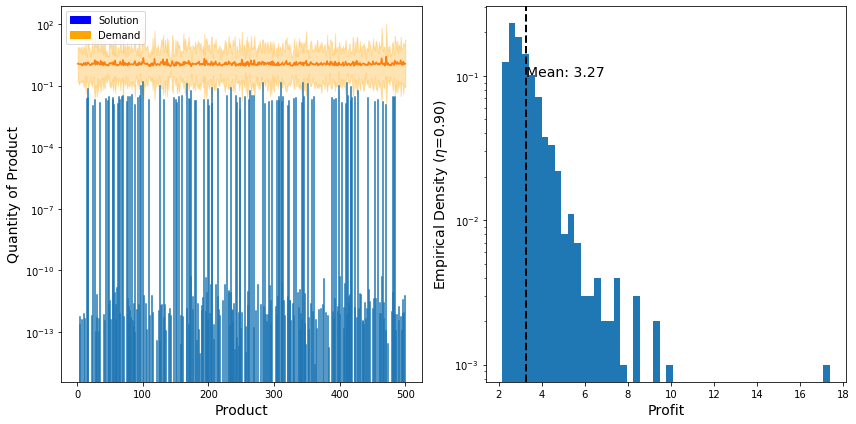

In [13]:
if dataset == "exp":
    my_plot_exp_density_one_result(best_xs[:, 0], objfs[0, :], int(iters_takens[0]), y)
else:
    my_plot_one_result(W, best_xs[:, 0], is_save_fig=False, figname="stock_option_result.pdf")

In [14]:
if dataset == "vecnewsven":
    D = W[0:n_w // 2, :]
    P = W[n_w // 2:n_w, :]
    cost = best_xs[0:n_product, 0].T.dot(prod_linear) + np.maximum(best_xs[0:n_product, 0] - prod_change_pnts, 0).T.dot(prod_linear_2)
    revenue = np.sum(P.T * (np.minimum(D.T, best_xs[0:n_product, 0])), axis=1)
    profits = np.sum(P.T * (np.minimum(D.T, best_xs[0:n_product, 0])), axis=1) - cost
    print(np.max(revenue), np.min(revenue))
    print(np.mean(profits), np.std(profits))

18.402036320884722 3.1613096703311325
3.272219938983462 1.0668548202271078


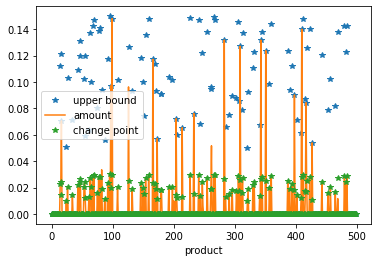

In [15]:
if dataset == "vecnewsven":
    prod_amount_bounds_plot = np.zeros(n_product)
    for i in range(n_product):
        if best_xs[i, 0] > 1e-2:
            prod_amount_bounds_plot[i] = prod_amount_bounds[i]
    plt.plot(prod_amount_bounds_plot, '*', label="upper bound")
    plt.plot(best_xs[0:n_product, 0], label="amount")
    prod_change_pnts_plot = np.zeros(n_product)
    for i in range(n_product):
        if best_xs[i, 0] > 1e-2:
            prod_change_pnts_plot[i] = prod_change_pnts[i]
    plt.plot(prod_change_pnts_plot, '*', label="change point")
    plt.xlabel("product")
    plt.legend()

In [16]:
if dataset == "cvar":
    print("loss probability = ", np.sum(W.T.dot(best_xs[1::, 0]) < 1) / N)
    print("mean", np.mean(W.T.dot(best_xs[1::, 0])))
    print("std", np.std(W.T.dot(best_xs[1::, 0])))
    print("std", np.std(W[0, :]))

In [17]:
if dataset == "cvar":
    year_returns = np.zeros((12, N))
    year_returns[0, :] = W.T.dot(best_xs[1::, 0])
    for i in range(1, 12):
        W_new_month = generate_random_data()
        new_returns = W_new_month.T.dot(best_xs[1::, 0])
        print(i, np.mean(new_returns), np.std(new_returns))
        year_returns[i, :] = new_returns
    acc_year_returns = np.exp(np.sum(np.log(year_returns), axis=0))
    print(np.mean(acc_year_returns))
    print(np.std(acc_year_returns))
    print(np.sum(acc_year_returns <= 1) / N)

## timing results

In [18]:
eps_gap_rel = 1e-3
eps_res_abs = 1e-4
eps_res_rel = 1e-3

In [19]:
for alg_idx in range(len(alg_props)):
    stop_iters = [max_num_rounds] * 2
    for i in range(10, max_num_rounds):
        if objfs[alg_idx, i] < np.inf and \
        objfs[alg_idx, i] - lower_bounds[alg_idx, i] <= np.abs(objfs[alg_idx, i] - objfs_validation[alg_idx, i]) + eps_gap_rel * np.abs(objfs[alg_idx, i]):
            stop_iters[0] = min(i, stop_iters[0])
        if ts[alg_idx, i] == 1 and \
        rms_residuals[alg_idx, i] <= eps_res_abs + eps_res_rel * (q_norms[alg_idx, i] + f_grad_norms[alg_idx, i]) / np.sqrt(n):
            stop_iters[1] = min(i, stop_iters[1])
        if max(stop_iters) < max_num_rounds:
            break
    print("iteration at which a stopping condition holds", stop_iters)
    stop_iter = min(stop_iters)
    solve_time = np.sum(runtimes[alg_idx, 0:np.min(stop_iters) + 1])
    f_evals = np.mean(num_f_evals[alg_idx, 1:np.min(stop_iters) + 1], axis=0)
    print("alg_idx =", alg_idx, ", solve time (stopping criteria) =", '{:g}'.format(float('{:.2g}'.format(solve_time))),
    ", iterations =", np.min(stop_iters), ", f evals =", '{:g}'.format(float('{:.2g}'.format(f_evals))))

iteration at which a stopping condition holds [20, 100]
alg_idx = 0 , solve time (stopping criteria) = 1.5 , iterations = 20 , f evals = 3.3


In [20]:
ep = 1e-6
for alg_idx in range(len(alg_props)):
    subopt = objfs[alg_idx, :] - np.min(objfs[alg_idx, :])
    iter_reach_ep = max_num_rounds
    for i in range(max_num_rounds):
        if subopt[i] <= ep:
            iter_reach_ep = i
            break
    f_evals = np.mean(num_f_evals[alg_idx, 1:iter_reach_ep + 1], axis=0)
    print("iters to reach 1e-6 subopt =", iter_reach_ep)
    print("solve time to reach 1e-6 subopt =", np.sum(runtimes[alg_idx, 0:iter_reach_ep + 1]))
    print("f evals", f_evals)

iters to reach 1e-6 subopt = 52
solve time to reach 1e-6 subopt = 4.258103609085083
f evals 3.2115384615384617


In [21]:
print("time cost detail")
print("===============f======grad f====subp====L_k====")
for alg_idx in range(len(alg_props)):
    f_eval = np.mean(time_cost_details[0, alg_idx, 1::])
    f_grad_eval = np.mean(time_cost_details[1, alg_idx, 1::])
    subp_ave = np.mean(time_cost_details[2, alg_idx, 2::])
    subp_first = time_cost_details[2, alg_idx, 1]
    L_k_ave = np.mean(time_cost_details[3, alg_idx, 20:100:10])
    L_k_first = time_cost_details[3, alg_idx, 10]
    print_results = [f_eval, f_grad_eval, subp_ave, L_k_ave]
    print(alg_idx, ['{:g}'.format(float('{:.2g}'.format(print_results[i]))) for i in range(4)])

time cost detail
===============f======grad f====subp====L_k====
0 ['0.0034', '0.0032', '0.073', '0.034']


In [22]:
linewidth = 2
fontsize = 16
font = {'family': 'serif',
        'size': fontsize,
        }

In [23]:
objfs_best = np.array(objfs)
for i in range(1, max_num_rounds):
    objfs_best[0, i] = np.min(objfs[0, 0:i + 1])
objf_min = np.min(objfs)

In [24]:
start_idx = 1
rms_residuals_best = np.array(rms_residuals)
for i in range(start_idx, max_num_rounds):
    rms_residuals_best[alg_idx, i] = np.min(rms_residuals[alg_idx, start_idx:i + 1])

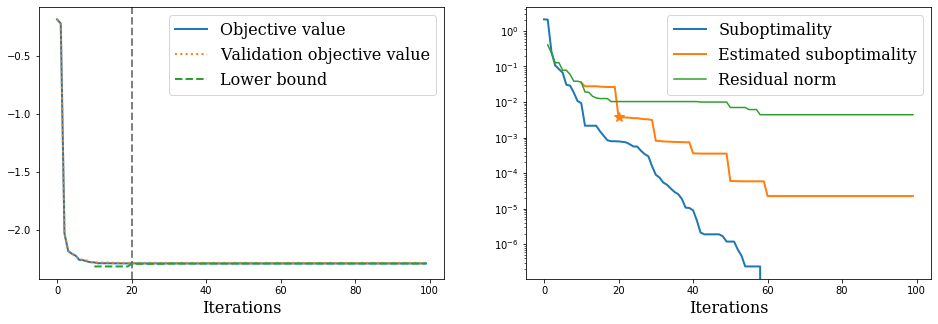

In [25]:
fig = plt.figure(tight_layout=False, figsize=(16, 5))
gs = gridspec.GridSpec(1, 2)
# plt.rcParams.update({'font.size': fontsize})

plot1 = fig.add_subplot(gs[0, 0])
rounds = range(0, max_num_rounds)
if stop_iter < max_num_rounds:
    plot1.axvline(stop_iter, color='gray', linestyle='dashed', linewidth=linewidth)
##objf
plot1.plot(np.array(rounds), objfs_best[alg_idx, 0:max_num_rounds], linewidth=linewidth, 
           label="Objective value")
##objf_validation
plot1.plot(np.array(rounds), objfs_validation[alg_idx, 0:max_num_rounds], ':', linewidth=linewidth, 
           label="Validation objective value")
##l_k
plot1.plot(np.array(rounds), lower_bounds[alg_idx, 0:max_num_rounds], '--', linewidth=linewidth, 
           label="Lower bound")

plot1.set_xlabel("Iterations", fontdict=font)
plot1.legend(prop=font)

#=========================================================================================================
plot2 = fig.add_subplot(gs[0, 1])
##subopt
plot2.plot(np.array(rounds), objfs_best[alg_idx, 0:max_num_rounds] - objf_min, linewidth=linewidth, 
           label="Suboptimality")
## gaps
gaps = objfs_best[alg_idx, 0:max_num_rounds] - lower_bounds[alg_idx, 0:max_num_rounds]
if np.min(gaps) < np.inf:
    plot2.plot(rounds, gaps, linewidth=linewidth, label="Estimated suboptimality")
if stop_iters[0] < max_num_rounds:
    plot2.plot(stop_iters[0], gaps[stop_iters[0]], ' *', color='#ff7f0e', markersize=10)
## residual norm
plot2.plot(rounds[start_idx::], rms_residuals_best[0, start_idx::], 
           label="Residual norm", color='#2ca02c')
if stop_iters[1] < max_num_rounds:
    plot2.plot(stop_iters[1], rms_residuals_best[0, stop_iters[1]], ' *', color='#2ca02c', markersize=10)

plot2.set_xlabel("Iterations", fontdict=font)
plot2.set_yscale("log")
plot2.legend(prop=font)

plot_iter_lim = None
ylim = None
if plot_iter_lim is not None:
    plot1.set_xlim([0, plot_iter_lim])
    plot2.set_xlim([0, plot_iter_lim])
if ylim is not None:
    plot2.set_ylim([ylim[0], ylim[1]])